<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BNLP2%5DAnaliseSentimentosPT_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [108]:
# https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47

# Pra entender melhor stopwords

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/stacktecnologias/stack-repo/master/Tweets_Mg.csv')
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [111]:
df['Text'][0]

'���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ'

In [112]:
df['Classificacao'][10]

'Neutro'

In [113]:
def hashtag(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

In [114]:
hashtag(" #blalbla")

['blalbla']

In [115]:
def remove_username(text):
  clean_text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
  return clean_text

In [116]:
remove_username("@tVAdiiiiiiiiitya2000 Hahahah beleza!")

' Hahahah beleza!'

In [117]:
def remove_links_http(text):
  text = re.sub(r'http\S+','', text)
  # text = re.sub(r'https','', text)
  text = re.sub(r'bit.ly/\S+','', text)
  text = text.strip('[link]')

  return text

In [118]:
remove_links_http(df['Text'][0])

'���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG '

In [119]:
def remove_html_tag(text):
  clean_text = re.compile('<.*?>')
  return clean_text.sub(r'', text)

In [120]:
# Será que remove caracteres estranhos???
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

In [121]:
# remover stopwords
stopptbr = stopwords.words("portuguese")

In [122]:
len(set(stopptbr))

204

In [123]:
def remove_stopwords(text):
  stopptbr = set(stopwords.words("portuguese"))
  clean_text = ' '.join([word for word in text.split() if word not in stopptbr])

  return clean_text

In [124]:
def remove_email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'',text)

In [125]:
def remove_punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text 

In [126]:
df['hashtag'] = df.Text.apply(func=hashtag)
df['CleanText'] = df.Text.apply(func=remove_links_http)
df['CleanText'] = df.CleanText.apply(func=remove_username)

df['CleanText'] = df.CleanText.apply(func=remove_html_tag)
df['CleanText'] = df.CleanText.apply(func=non_ascii)
df['CleanText'] = df.CleanText.apply(func=lower)
df['CleanText'] = df.CleanText.apply(func=remove_stopwords)
df['CleanText'] = df.CleanText.apply(func=remove_email_address)
df['CleanText'] = df.CleanText.apply(func=remove_punct)


In [127]:
df['CleanText'][0]

'catedral santo antnio governador valadares mg'

In [128]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'hashtag', 'CleanText'],
      dtype='object')


,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,hashtag,CleanText
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],catedral santo antnio governador valadares mg
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],governador valadares minas gerais
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],governador valadares minas gerais
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],psol vai questionar aumento vereadores prefeit...


In [129]:
df.Text[0]

'���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ'

In [130]:
df.CleanText[0]

'catedral santo antnio governador valadares mg'

In [131]:
df_new = df[['Text', 'Classificacao', 'hashtag', 'CleanText']]

In [132]:
df_new.head()

,Text,Classificacao,hashtag,CleanText
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro,[],catedral santo antnio governador valadares mg
1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro,[],governador valadares minas gerais
2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro,[],governador valadares minas gerais
3,��� https://t.co/BnDsO34qK0,Neutro,[],
4,��� PSOL vai questionar aumento de vereadores ...,Negativo,[],psol vai questionar aumento vereadores prefeit...


In [133]:
df_new.Classificacao.unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [134]:
dicio = {'Neutro': 0, 'Negativo': 1, 'Positivo': 2}
df_new = df_new.replace({"Classificacao": dicio})

In [135]:
df_new.head()

,Text,Classificacao,hashtag,CleanText
0,���⛪ @ Catedral de Santo Antônio - Governador ...,0,[],catedral santo antnio governador valadares mg
1,"� @ Governador Valadares, Minas Gerais https:/...",0,[],governador valadares minas gerais
2,"�� @ Governador Valadares, Minas Gerais https:...",0,[],governador valadares minas gerais
3,��� https://t.co/BnDsO34qK0,0,[],
4,��� PSOL vai questionar aumento de vereadores ...,1,[],psol vai questionar aumento vereadores prefeit...


In [136]:
df_new.CleanText[4]

'psol vai questionar aumento vereadores prefeito bh justia politica estado minas'

In [137]:
df_new["Classificacao"].value_counts()

2    3300
0    2453
1    2446
Name: Classificacao, dtype: int64

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [149]:
train, test = train_test_split(df_new, test_size=0.3, stratify = df_new["Classificacao"], random_state = 2022 )

In [150]:
y_train = train['Classificacao'].values
y_test = test['Classificacao'].values

In [152]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=1)
tfidf.fit_transform(train['CleanText'].values)
train_feature_set=tfidf.transform(train['CleanText'].values)
test_feature_set=tfidf.transform(test['CleanText'].values)

In [153]:
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


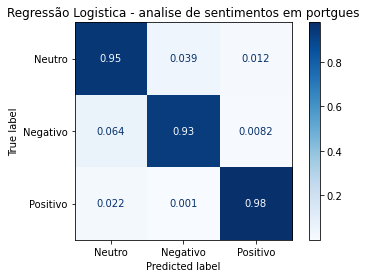

In [158]:
disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Neutro', 'Negativo', 'Positivo'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Regressão Logistica - analise de sentimentos em portgues');

In [167]:
lr.predict(tfidf.transform(["brasil vai questionar aumento"]))

array([1])

In [168]:
# https://github.com/piegu
# https://www.educative.io/edpresso/countvectorizer-in-python
# https://monkeylearn.com/blog/what-is-tf-idf/

In [158]:
# https://www.kaggle.com/code/lidiamiranda/portuguese-news-ulmfit/data
# https://www.kaggle.com/c/nlp-deeplearningbrasil-ml-challenge/data

In [169]:
# https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91
# https://medium.com/@theclickreader/sentiment-analysis-using-python-and-deep-learning-in-3-lines-of-code-722db66fff37

In [ ]:
# https://huggingface.co/docs/transformers/index